# Exploratory data analysis (EDA) 

In [178]:
## Technical Assessment – Analyst, Data Science – 008272- Emma Luk

### The Supervision Manager has asked for assistance in allocating scarce resources and identifying which firms the team should focus on. To make this decision, the following characteristics will be taken into consideration: 

- firm size, 
- changing business profile, and 
- outliers from the norm. 

The provided metrics include 
- Gross Written Premium (GWP), 
- Net Written Premium (NWP), 
- SCR coverage ratio, 
- Gross claims incurred, and
- Net combined ratio. 

These metrics will help to determine the profitability, risk management, and overall financial stability of the firms.

# Research Question:
What kinds of trends are in the data?
What kinds of predictions are possible?
What conclusions can we make?

## Step 0: Imports and Reading Data

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [132]:
import pandas as pd
pd.set_option('display.max_columns', 500)
#pd.set_option('max_columns', 200)

In [133]:
# load the data into a pandas dataframe
#df1 = pd.read_excel('revised_data.xlsx', sheet_name='average')
df1 = pd.read_excel('average.xlsx', sheet_name='average')
# load the data into a pandas dataframe
#df2 = pd.read_excel('revised_data.xlsx', sheet_name='2020')

In [134]:
df1

,Firm,GWP (£m),NWP (£m),Gross claims incurred (£m),Pure net claims ratio,Net expense ratio,SCR (£m),EoF for SCR (£m),SCR coverage ratio,Net combined ratio,Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity]
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


## Step 1: Data Understanding¶
- Dataframe shape
- head and tail
- dtypes
- describe

In [135]:
df1.shape

(325, 13)

In [136]:
df1.head(326)

,Firm,GWP (£m),NWP (£m),Gross claims incurred (£m),Pure net claims ratio,Net expense ratio,SCR (£m),EoF for SCR (£m),SCR coverage ratio,Net combined ratio,Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity]
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


In [137]:
df1.isna().sum()

Firm                                                 0
GWP (£m)                                             0
NWP (£m)                                             0
Gross claims incurred (£m)                           0
Pure net claims ratio                                0
Net expense ratio                                    0
SCR (£m)                                             0
EoF for SCR (£m)                                     0
SCR coverage ratio                                   0
Net combined ratio                                   0
Total assets (£m)                                    0
Total liabilities (£m)                               0
Excess of assets over liabilities (£m) [= equity]    0
dtype: int64

In [138]:
df1.columns

Index(['Firm', 'GWP (£m)', 'NWP (£m) ', 'Gross claims incurred (£m)',
       'Pure net claims ratio', 'Net expense ratio', 'SCR (£m)',
       'EoF for SCR (£m)', 'SCR coverage ratio', 'Net combined ratio',
       'Total assets (£m)', 'Total liabilities (£m)',
       'Excess of assets over liabilities (£m) [= equity]'],
      dtype='object')

In [139]:
df1.dtypes

Firm                                                  object
GWP (£m)                                             float64
NWP (£m)                                             float64
Gross claims incurred (£m)                           float64
Pure net claims ratio                                float64
Net expense ratio                                    float64
SCR (£m)                                             float64
EoF for SCR (£m)                                     float64
SCR coverage ratio                                   float64
Net combined ratio                                   float64
Total assets (£m)                                    float64
Total liabilities (£m)                               float64
Excess of assets over liabilities (£m) [= equity]    float64
dtype: object

In [140]:
df1.describe()

,GWP (£m),NWP (£m),Gross claims incurred (£m),Pure net claims ratio,Net expense ratio,SCR (£m),EoF for SCR (£m),SCR coverage ratio,Net combined ratio,Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity]
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,325.000000,325.000000,325.000000
mean,936.694961,731.756135,141.658590,2453.452600,1653.948609,346.635184,504.096123,1.228704e+06,-11.063437,7244.856179,7080.304690,539.107196
std,4250.562488,3195.870760,399.898744,46017.534293,29856.550368,1439.783918,1928.315464,1.510808e+07,948.400107,28333.101073,29132.574495,1992.076390
min,-0.794574,-3550.820097,-25.728673,-33721.020240,-1407.724813,0.000000,-100.502590,-8.395307e-01,-14690.054203,-25.672482,-711.640796,-74.756995
25%,0.014883,0.000000,0.000000,0.000000,0.000000,3.671022,9.212982,1.087744e+00,0.000000,22.875033,7.342138,10.066743
50%,21.543218,11.084505,6.294377,1.361904,0.210059,21.531101,39.673438,1.762973e+00,0.608904,181.378442,93.141198,46.735731
75%,242.131047,165.771969,98.279291,3.059548,0.406532,111.637603,209.758640,3.032636e+00,1.006716,1152.039461,789.649453,200.339065
max,53157.315962,35411.422650,3319.574898,828809.371523,538242.493903,16203.866616,25382.318218,1.998606e+08,8636.437265,278917.185617,255475.880122,20771.454505


## Step 2: Data Preperation¶
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [141]:
df1.head(5)

,Firm,GWP (£m),NWP (£m),Gross claims incurred (£m),Pure net claims ratio,Net expense ratio,SCR (£m),EoF for SCR (£m),SCR coverage ratio,Net combined ratio,Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity]
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349


In [142]:
df1.dtypes

Firm                                                  object
GWP (£m)                                             float64
NWP (£m)                                             float64
Gross claims incurred (£m)                           float64
Pure net claims ratio                                float64
Net expense ratio                                    float64
SCR (£m)                                             float64
EoF for SCR (£m)                                     float64
SCR coverage ratio                                   float64
Net combined ratio                                   float64
Total assets (£m)                                    float64
Total liabilities (£m)                               float64
Excess of assets over liabilities (£m) [= equity]    float64
dtype: object

In [143]:
# Rename our columns

df1 = df1.rename(columns={'GWP (£m)':'GWP_mean',
                          'NWP (£m) ':'NWP_mean',
                          'Gross claims incurred (£m)':'Gross_claims_incurred_mean',
                          'Pure net claims ratio':'Pure_net_claims_ratio_mean',
                          'Net expense ratio':'Net_expense_ratio_mean',
                          'SCR (£m)':'SCR_mean',
                          'EoF for SCR (£m)':'EoF_for_SCR_mean',
                          'SCR coverage ratio':'SCR_coverage_ratio_mean',
                          'Net combined ratio': 'Net_combined_ratio_mean',
                          'Total assets (£m)':'Total_assets_mean',
                          'Total liabilities (£m)':'Total_liabilities_mean',
                          'Excess of assets over liabilities (£m) [= equity]':'Excess_of_assets_over_liabilities_mean'})


In [144]:
df1

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


In [145]:
df1.columns

Index(['Firm', 'GWP_mean', 'NWP_mean', 'Gross_claims_incurred_mean',
       'Pure_net_claims_ratio_mean', 'Net_expense_ratio_mean', 'SCR_mean',
       'EoF_for_SCR_mean', 'SCR_coverage_ratio_mean',
       'Net_combined_ratio_mean', 'Total_assets_mean',
       'Total_liabilities_mean', 'Excess_of_assets_over_liabilities_mean'],
      dtype='object')

In [33]:
# Converted data from object to numeric

#df1['Firm_Name'] = pd.to_numeric(df1['Firm_Name'], errors='coerce')
#df1['NWP_(£m)_2016'] = pd.to_numeric(df1['NWP_(£m)_2016'], errors='coerce')
#df1['GWP_mean'] = pd.to_numeric(df1['GWP_mean'], errors='coerce')
#df1['NWP_mean'] = pd.to_numeric(df1['NWP_mean'], errors='coerce')
#df1['Gross_claims_incurred_mean'] = pd.to_numeric(df1['Gross_claims_incurred_mean'], errors='coerce')
#df1['Pure_net_claims_ratio_mean'] = pd.to_numeric(df1['Pure_net_claims_ratio_mean'], errors='coerce')
#df1['Net_expense_ratio_mean'] = pd.to_numeric(df1['Net_expense_ratio_mean'], errors='coerce')
#df1['SCR_mean'] = pd.to_numeric(df1['SCR_mean'], errors='coerce')
#df1['EoF_for_SCR_mean'] = pd.to_numeric(df1['EoF_for_SCR_mean'], errors='coerce')
#df1['SCR_coverage_ratio_mean'] = pd.to_numeric(df1['SCR_coverage_ratio_mean'], errors='coerce')
#df1['Total_assets_mean'] = pd.to_numeric(df1['Total_assets_mean'], errors='coerce')
#df1['Total_liabilities_mean'] = pd.to_numeric(df1['Total_liabilities_mean'], errors='coerce')
#df1['Excess_of_assets_over_liabilities_mean'] = pd.to_numeric(df1['Excess_of_assets_over_liabilities_mean'], errors='coerce')


In [146]:
df1.isna().sum()

Firm                                      0
GWP_mean                                  0
NWP_mean                                  0
Gross_claims_incurred_mean                0
Pure_net_claims_ratio_mean                0
Net_expense_ratio_mean                    0
SCR_mean                                  0
EoF_for_SCR_mean                          0
SCR_coverage_ratio_mean                   0
Net_combined_ratio_mean                   0
Total_assets_mean                         0
Total_liabilities_mean                    0
Excess_of_assets_over_liabilities_mean    0
dtype: int64

In [147]:
df1

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


In [148]:
df1.isna().sum()

Firm                                      0
GWP_mean                                  0
NWP_mean                                  0
Gross_claims_incurred_mean                0
Pure_net_claims_ratio_mean                0
Net_expense_ratio_mean                    0
SCR_mean                                  0
EoF_for_SCR_mean                          0
SCR_coverage_ratio_mean                   0
Net_combined_ratio_mean                   0
Total_assets_mean                         0
Total_liabilities_mean                    0
Excess_of_assets_over_liabilities_mean    0
dtype: int64

In [149]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [150]:
df1.loc[df1.duplicated()]

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean


In [ ]:
# Check for duplicate coaster name
#df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

In [151]:
df1.columns

Index(['Firm', 'GWP_mean', 'NWP_mean', 'Gross_claims_incurred_mean',
       'Pure_net_claims_ratio_mean', 'Net_expense_ratio_mean', 'SCR_mean',
       'EoF_for_SCR_mean', 'SCR_coverage_ratio_mean',
       'Net_combined_ratio_mean', 'Total_assets_mean',
       'Total_liabilities_mean', 'Excess_of_assets_over_liabilities_mean'],
      dtype='object')

In [152]:
df1

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


## Step 3: Feature Understanding¶
(Univariate analysis)

- Plotting Feature Distributions
- Histogram
- KDE
- Boxplot

In [153]:
df1

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


In [154]:
df1['NWP_mean'].value_counts()

 0.000000       64
-3550.820097     1
 2.159676        1
 2054.835400     1
 31.480126       1
                ..
 139.260481      1
 104.163497      1
 269.004441      1
 0.000754        1
 232.527572      1
Name: NWP_mean, Length: 262, dtype: int64

In [155]:

df1['GWP_mean'].value_counts()

0.000000       59
9.353606        1
19.264844       1
22.359106       1
15.509079       1
               ..
0.000683        1
3.556642        1
2998.228310     1
6.127025        1
359.808314      1
Name: GWP_mean, Length: 267, dtype: int64

Text(0, 0.5, 'Count')

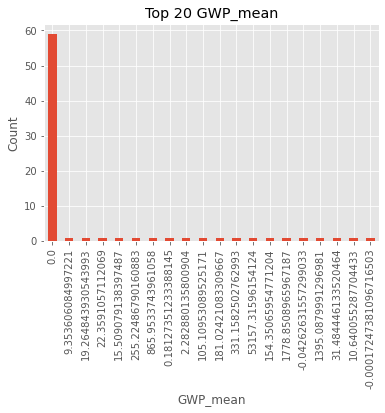

In [156]:
ax= df1['GWP_mean'].value_counts() \
.head(20) \
.plot(kind='bar', title='Top 20 GWP_mean')
ax.set_xlabel('GWP_mean')
ax.set_ylabel('Count')

In [157]:
df1['NWP_mean'].value_counts()

 0.000000       64
-3550.820097     1
 2.159676        1
 2054.835400     1
 31.480126       1
                ..
 139.260481      1
 104.163497      1
 269.004441      1
 0.000754        1
 232.527572      1
Name: NWP_mean, Length: 262, dtype: int64

Text(0, 0.5, 'Count')

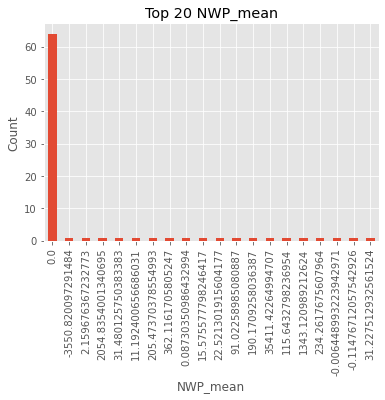

In [158]:
ax= df1['NWP_mean'].value_counts() \
    .head(20) \
    .plot(kind='bar', title='Top 20 NWP_mean')
ax.set_xlabel('NWP_mean')
ax.set_ylabel('Count')

In [159]:
df1['Gross_claims_incurred_mean'].value_counts()

 0.000000       88
 0.001103        1
 12.015472       1
 128.939999      1
 85.368909       1
                ..
 3.290657        1
 272.693434      1
-1.070160        1
 2947.025734     1
 1.647041        1
Name: Gross_claims_incurred_mean, Length: 238, dtype: int64

In [160]:
df1['Pure_net_claims_ratio_mean'].value_counts()

0.000000     111
17.184308      1
5.581748       1
2.555676       1
0.989283       1
            ... 
3.691070       1
3.816425       1
3.309626       1
0.638336       1
2.209822       1
Name: Pure_net_claims_ratio_mean, Length: 215, dtype: int64

In [161]:
df1['GWP_mean'].nlargest (10)

209    53157.315962
3      42837.104819
310    17110.301262
246    15542.935718
104    13330.761645
25     10402.641314
33     10238.574251
72      9442.209669
6       8616.174240
150     7854.193072
Name: GWP_mean, dtype: float64

In [162]:
df3=df1.sort_values(by='GWP_mean', ascending = False).head(10)
df3

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
209,Firm 210,53157.315962,35411.422650,443.206819,3.899782,0.492057,249.243799,1141.420020,1.547534,0.682800,202189.364985,245325.499448,573.266443
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826,0.953890,79526.039920,66461.046610,16335.857692
310,Firm 311,17110.301262,8512.949759,7.985453,1.900473,0.265827,7598.123271,9034.757264,1.188844,0.767002,278917.185617,255475.880122,6243.842523
246,Firm 247,15542.935718,8265.529895,2.884472,0.099080,0.268377,33.201904,133.309360,7.147686,0.299126,99925.934335,86571.611460,97.547127
104,Firm 105,13330.761645,16788.314194,2818.049217,3.691070,0.358851,15013.867222,12445.578734,1.693345,1.554439,164764.574513,190962.568367,20771.454505
25,Firm 26,10402.641314,22409.048775,346.166539,3.672110,0.345603,2451.034325,4264.038760,1.661885,0.880277,85355.188438,57670.931532,5903.135199
33,Firm 34,10238.574251,4643.560658,9.185216,3.540875,0.975126,4915.523194,8215.632730,2.367411,1.918263,145131.043172,163957.611023,12371.677830
72,Firm 73,9442.209669,6327.672545,47.045947,2.434752,0.179977,2439.073420,3751.744799,2.161199,0.993768,52511.247536,57589.289309,4120.829543
6,Firm 7,8616.174240,6377.697934,0.000000,0.000000,0.000000,4091.539703,7735.167339,1.207964,0.000000,56070.719315,70536.950390,10232.547756
150,Firm 151,7854.193072,6968.749302,-25.728673,-3.731960,0.383491,939.509304,2193.108509,1.567368,-0.749141,75178.005742,89434.747548,2352.086073


In [62]:
#df3['GWP_mean'] = df3['GWP_mean']/1000

<AxesSubplot:xlabel='Firm', ylabel='GWP_mean'>

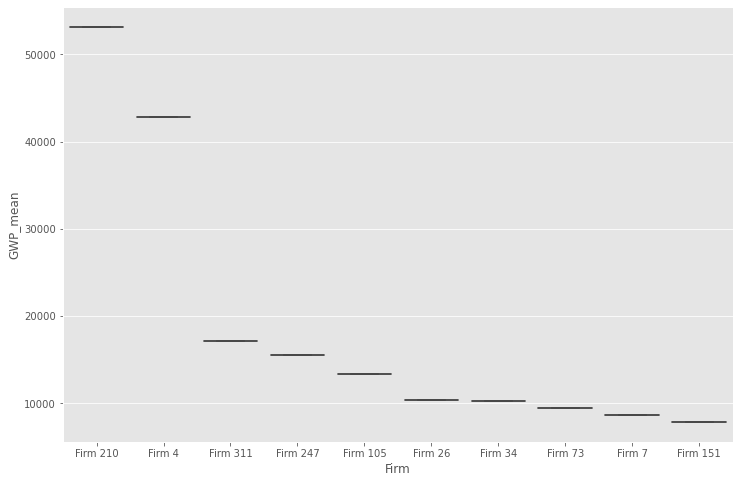

In [163]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3,
           x='Firm',
           y='GWP_mean')


<AxesSubplot:xlabel='Firm', ylabel='count'>

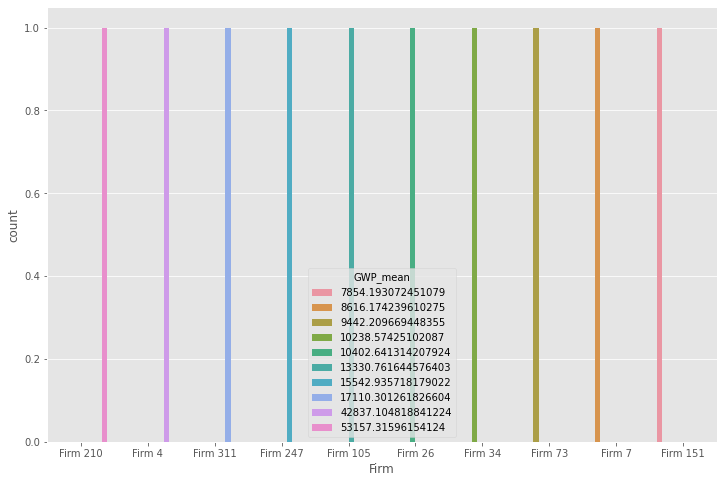

In [164]:
plt.figure(figsize=(12,8))
sns.countplot(data=df3,
           x='Firm',
           hue='GWP_mean')

<AxesSubplot:xlabel='GWP_mean', ylabel='count'>

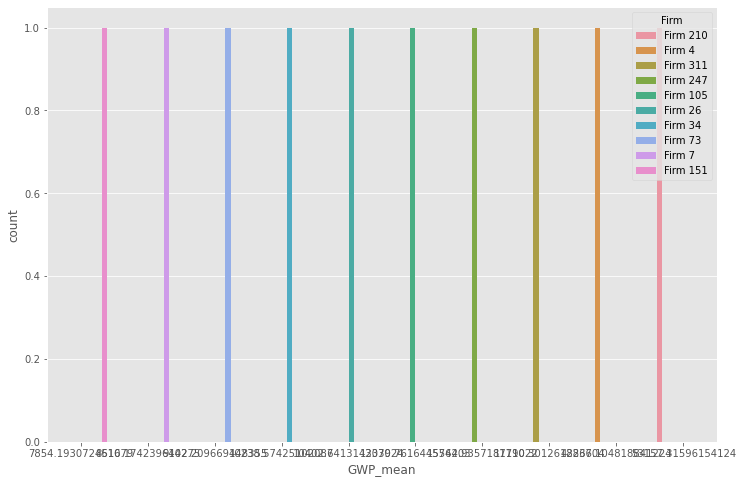

In [165]:
plt.figure(figsize=(12,8))
sns.countplot(data=df3,
           hue='Firm',
           x='GWP_mean')

In [166]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 209 to 150
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Firm                                    10 non-null     object 
 1   GWP_mean                                10 non-null     float64
 2   NWP_mean                                10 non-null     float64
 3   Gross_claims_incurred_mean              10 non-null     float64
 4   Pure_net_claims_ratio_mean              10 non-null     float64
 5   Net_expense_ratio_mean                  10 non-null     float64
 6   SCR_mean                                10 non-null     float64
 7   EoF_for_SCR_mean                        10 non-null     float64
 8   SCR_coverage_ratio_mean                 10 non-null     float64
 9   Net_combined_ratio_mean                 10 non-null     float64
 10  Total_assets_mean                       10 non-null     float

<AxesSubplot:title={'center':'Net_expense_ratio_mean'}, ylabel='Frequency'>

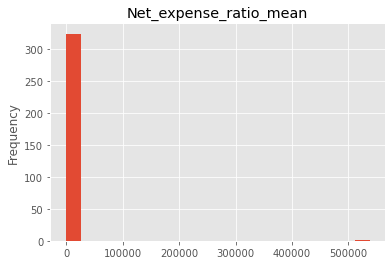

In [167]:
df1['Net_expense_ratio_mean'].plot(kind='hist', bins=20, title='Net_expense_ratio_mean')

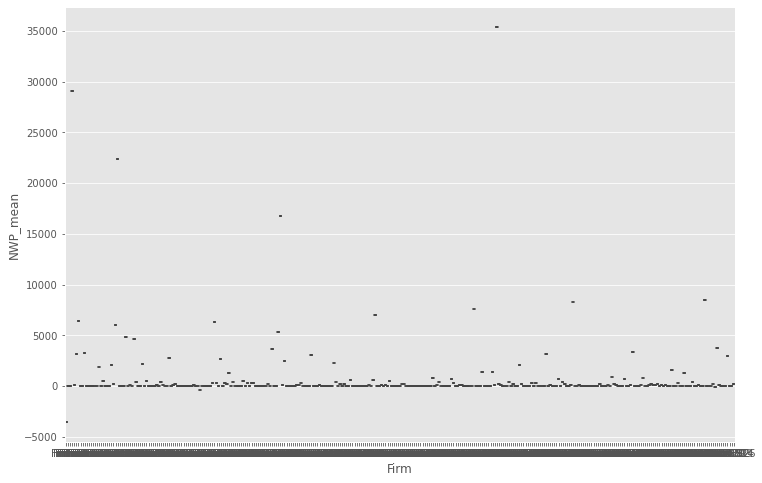

In [89]:
plt.figure(figsize=(12,8))
box_plot=sns.boxplot(data=df1,
           x='Firm',
           y='NWP_mean')
plt.show()

<AxesSubplot:title={'center':'EoF_for_SCR_mean'}, ylabel='Frequency'>

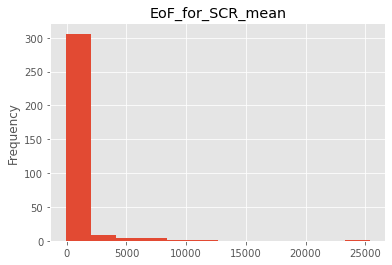

In [168]:
df1['EoF_for_SCR_mean'].plot(kind='hist', bins=12, title='EoF_for_SCR_mean')

Text(0.5, 0, 'SCR_coverage_ratio_mean')

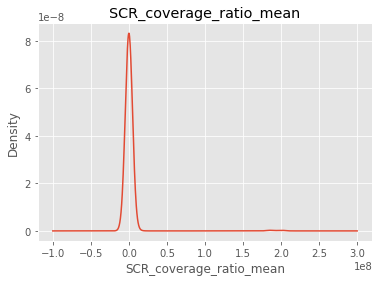

In [169]:
ax = df1['SCR_coverage_ratio_mean'].plot(kind='kde', 
                               title='SCR_coverage_ratio_mean')
ax.set_xlabel('SCR_coverage_ratio_mean')

## Step 4: Feature Relationships¶
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

<Figure size 864x576 with 0 Axes>

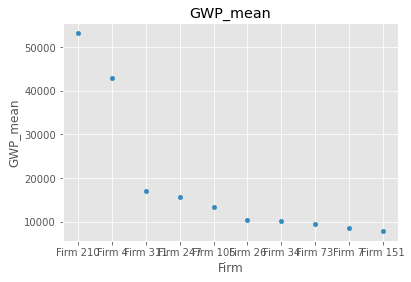

In [170]:
plt.figure(figsize=(12,8))
df3.plot(kind='scatter',
        x='Firm',
        y='GWP_mean',
        title='GWP_mean')
plt.show()

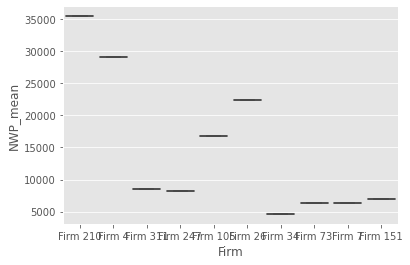

In [171]:
box_plot=sns.boxplot(data=df3,
           x='Firm',
           y='NWP_mean')
plt.show()

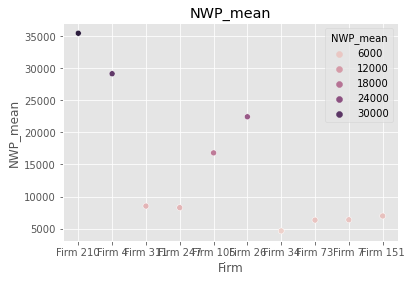

In [172]:
ax = sns.scatterplot(x='Firm',
                y='NWP_mean',
                hue='NWP_mean',
                data=df3)
ax.set_title('NWP_mean')
plt.show()

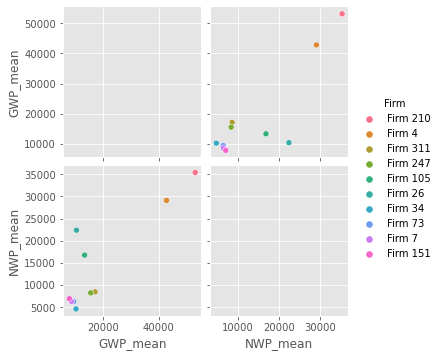

In [94]:
sns.pairplot(df3,
             vars=['GWP_mean','NWP_mean'],
            hue='Firm')
plt.show()

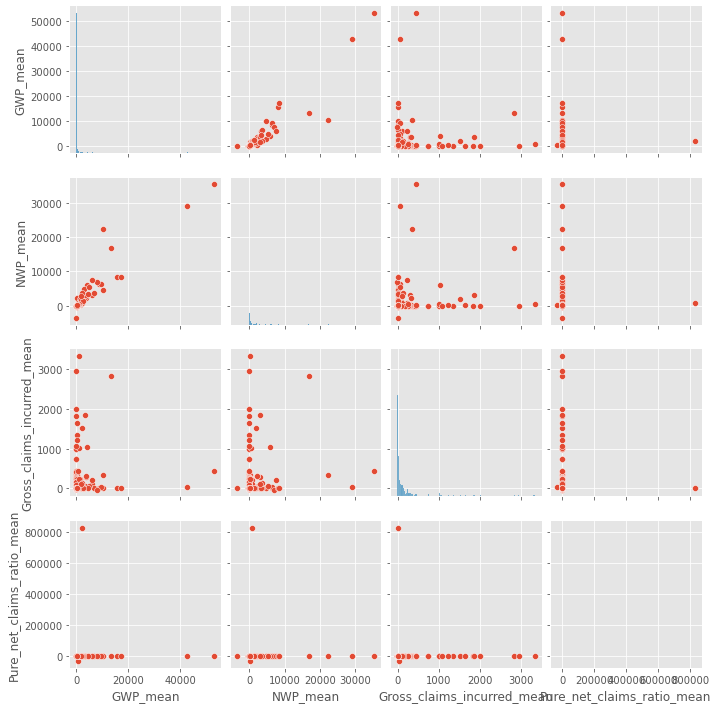

In [95]:
sns.pairplot(df1,
             vars=['GWP_mean','NWP_mean',
                   'Gross_claims_incurred_mean','Pure_net_claims_ratio_mean'],)
plt.show()

In [173]:
df_corr = df1[['Firm','GWP_mean','NWP_mean',
                   'SCR_mean','Total_assets_mean']].dropna().corr()
df_corr

,GWP_mean,NWP_mean,SCR_mean,Total_assets_mean
GWP_mean,1.000000,0.940152,0.611470,0.721618
NWP_mean,0.940152,1.000000,0.638767,0.695215
SCR_mean,0.611470,0.638767,1.000000,0.644266
Total_assets_mean,0.721618,0.695215,0.644266,1.000000


<AxesSubplot:>

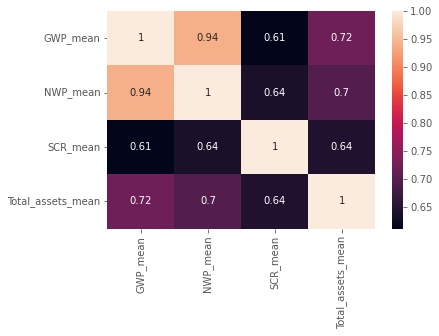

In [174]:
sns.heatmap(df_corr, annot=True)

In [175]:
df_corr1 = df1[['Firm', 'GWP_mean', 'NWP_mean', 'Gross_claims_incurred_mean',
                'Pure_net_claims_ratio_mean', 'Net_expense_ratio_mean', 'SCR_mean',
                'EoF_for_SCR_mean', 'SCR_coverage_ratio_mean','Net_combined_ratio_mean',
                'Total_assets_mean','Total_liabilities_mean',
                'Excess_of_assets_over_liabilities_mean']].dropna().corr()
df_corr1

,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
GWP_mean,1.000000,0.940152,0.092687,0.016344,0.016155,0.611470,0.669695,-0.006490,0.011420,0.721618,0.741752,0.550162
NWP_mean,0.940152,1.000000,0.151071,-0.000006,-0.000355,0.638767,0.664305,0.010799,0.006236,0.695215,0.707683,0.599893
Gross_claims_incurred_mean,0.092687,0.151071,1.000000,-0.019121,-0.019735,0.215602,0.128728,0.339606,0.001320,0.137912,0.139838,0.191948
Pure_net_claims_ratio_mean,0.016344,-0.000006,-0.019121,1.000000,0.999276,0.061694,0.145982,-0.004345,0.541909,0.076399,0.030968,0.104294
Net_expense_ratio_mean,0.016155,-0.000355,-0.019735,0.999276,1.000000,0.061647,0.145931,-0.004518,0.509616,0.076019,0.030540,0.104115
SCR_mean,0.611470,0.638767,0.215602,0.061694,0.061647,1.000000,0.951205,0.008638,0.032456,0.644266,0.636084,0.936331
EoF_for_SCR_mean,0.669695,0.664305,0.128728,0.145982,0.145931,0.951205,1.000000,-0.005524,0.076880,0.647052,0.629606,0.910691
SCR_coverage_ratio_mean,-0.006490,0.010799,0.339606,-0.004345,-0.004518,0.008638,-0.005524,1.000000,0.001022,0.019997,0.012936,-0.010485
Net_combined_ratio_mean,0.011420,0.006236,0.001320,0.541909,0.509616,0.032456,0.076880,0.001022,1.000000,0.047641,0.024672,0.057880
Total_assets_mean,0.721618,0.695215,0.137912,0.076399,0.076019,0.644266,0.647052,0.019997,0.047641,1.000000,0.978500,0.670853


C:\Users\emma_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


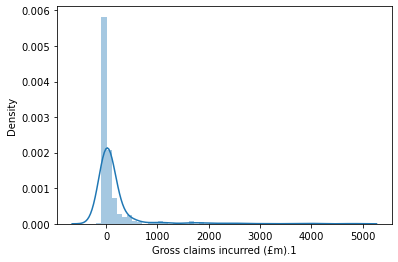

In [23]:
sns.distplot(df['Gross claims incurred (£m).1'])
plt.show()

<AxesSubplot:>

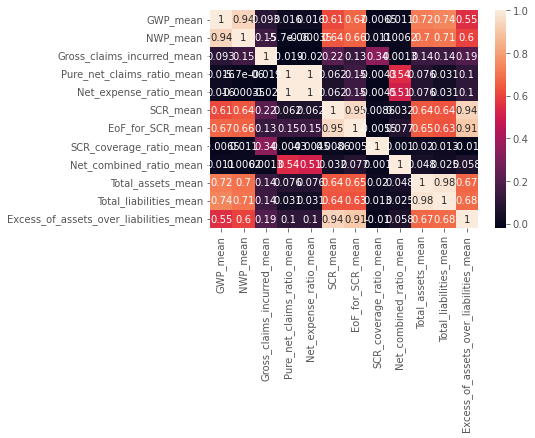

In [176]:
sns.heatmap(df_corr1, annot=True,)

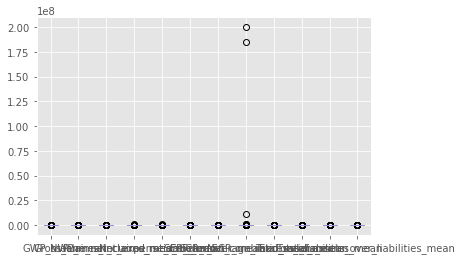

In [106]:
ax = df1.plot.box()

## Step 5: Ask a Question about the data¶
Try to answer a question I have about the data using a plot or statistic.
What are the Firm_Name with the highest Gross Claims, pure net claims, Net expense ratio, High GWP, NWP, without loss?

- see gross claims, pure net claims, net expense ratio.pdf
- high SWP, NWP & net profit w figures.pdf
- Tableau Dashboard and saved it in pdf
- work-3-top.pdf
- work3-weakness.pdf

In [177]:
df1

,Firm,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
0,Firm 1,9.353606,-3550.820097,0.001103,17.184308,8.202612,404.264372,484.071192,1.117740e+07,14.259768,12737.287040,8034.336631,249.664743
1,Firm 2,16.034703,19.884957,21.611589,0.478235,0.590570,12.464950,41.965658,5.706987e+00,0.827937,51.982837,11.000843,22.615194
2,Firm 3,78.578846,35.760105,0.000000,0.000000,0.000000,410.524363,600.025925,1.133127e+00,0.000000,1020.886360,726.808325,346.847126
3,Firm 4,42837.104819,29111.982801,43.852950,0.879086,0.080514,16203.866616,25382.318218,1.564826e+00,0.953890,79526.039920,66461.046610,16335.857692
4,Firm 5,48.345110,71.990032,269.179206,4.848498,0.167213,45.990693,167.883720,3.124074e+00,1.222328,186.393331,96.559703,115.002349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,15.810911,4.855652,5.148679,2.483186,0.229962,63.010298,81.369071,6.169212e+00,0.596259,2652.283426,2815.021649,41.730253
321,Firm 322,1641.277935,2935.647964,107.450121,1.124050,0.924658,1258.474502,1221.750181,1.692352e+00,1.382454,5974.006170,5581.087596,2768.633500
322,Firm 323,0.000000,0.000000,0.000000,0.000000,0.000000,8.863583,45.587888,1.955650e+01,0.000000,69.028907,26.987871,69.855025
323,Firm 324,101.384970,24.060966,4.994887,2.209822,0.332172,35.701622,49.416705,7.454092e-01,0.988765,406.938357,306.741281,46.221204


In [108]:
df1.describe()

,GWP_mean,NWP_mean,Gross_claims_incurred_mean,Pure_net_claims_ratio_mean,Net_expense_ratio_mean,SCR_mean,EoF_for_SCR_mean,SCR_coverage_ratio_mean,Net_combined_ratio_mean,Total_assets_mean,Total_liabilities_mean,Excess_of_assets_over_liabilities_mean
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,325.000000,325.000000,325.000000
mean,936.694961,731.756135,141.658590,2453.452600,1653.948609,346.635184,504.096123,1.228704e+06,-11.063437,7244.856179,7080.304690,539.107196
std,4250.562488,3195.870760,399.898744,46017.534293,29856.550368,1439.783918,1928.315464,1.510808e+07,948.400107,28333.101073,29132.574495,1992.076390
min,-0.794574,-3550.820097,-25.728673,-33721.020240,-1407.724813,0.000000,-100.502590,-8.395307e-01,-14690.054203,-25.672482,-711.640796,-74.756995
25%,0.014883,0.000000,0.000000,0.000000,0.000000,3.671022,9.212982,1.087744e+00,0.000000,22.875033,7.342138,10.066743
50%,21.543218,11.084505,6.294377,1.361904,0.210059,21.531101,39.673438,1.762973e+00,0.608904,181.378442,93.141198,46.735731
75%,242.131047,165.771969,98.279291,3.059548,0.406532,111.637603,209.758640,3.032636e+00,1.006716,1152.039461,789.649453,200.339065
max,53157.315962,35411.422650,3319.574898,828809.371523,538242.493903,16203.866616,25382.318218,1.998606e+08,8636.437265,278917.185617,255475.880122,20771.454505


### Step 6: Resources
- Python code
- pandas-profiling

In [ ]:
import pandas as pd
import numpy as np

def allocate_resources(data):
    # Calculate the mean and standard deviation of the Gross claims incurred and Gross BEL columns
    mean = data[["Gross claims incurred (£m)", "Gross BEL (inc. TPs as whole, pre-TMTP) (£m)"]].mean()
    std = data[["Gross claims incurred (£m)", "Gross BEL (inc. TPs as whole, pre-TMTP) (£m)"]].std()

    # Create a new column "Attention" to store the allocation score
    data["Attention"] = 0

    # Allocate resources based on firm size
    data.loc[data["Gross claims incurred (£m)"].idxmax(), "Attention"] += 1
    data.loc[data["Gross BEL (inc. TPs as whole, pre-TMTP) (£m)"].idxmax(), "Attention"] += 1

    # Allocate resources based on changing business profile
    for column in data.columns:
        if "Gross claims incurred (£m)" in column or "Gross BEL (inc. TPs as whole, pre-TMTP) (£m)" in column:
            change = data[column].pct_change()
            data.loc[(change > 0.1) | (change < -0.1), "Attention"] += 1

    # Allocate resources based on outliers from the norm
    for column in data.columns:
        if "Gross claims incurred (£m)" in column or "Gross BEL (inc. TPs as whole, pre-TMTP) (£m)" in column:
            data.loc[(data[column] > mean[column] + 2 * std[column]) | (data[column] < mean[column] - 2 * std[column]), "Attention"] += 1

    # Sort the data by the Attention column
    data = data.sort_values(by="Attention", ascending=False)

    # Reset the index of the data
    data = data.reset_index(drop=True)

    # Return the firms that should receive the most attention
    return data[["Unnamed: 0", "Attention"]].head()

# Load the data from a CSV file
# data = pd.read_csv("data.csv")
data = pd.read_excel('data.xlsx', sheet_name='Dataset 2 - Underwriting')
# Allocate the supervisory resources
result = allocate_resources(data)

# Print the result
print(result)


In [20]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [24]:
#importing required packages
import pandas as pd
import pandas_profiling
import numpy as np

#importing the data
# df = pd.read_csv('sample.csv')
# load the data into a pandas dataframe
df = pd.read_excel('data.xlsx', sheet_name='Dataset 2 - Underwriting')

#descriptive statistics
pandas_profiling.ProfileReport(df)
#pandas_profiling.to_file("profile_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:

import pandas as pd
from pandas_profiling import ProfileReport

data = pd.read_excel('data.xlsx', sheet_name='Dataset 2 - Underwriting')
profile = ProfileReport(data)
profile.to_file("profile_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]